In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2CdS3DRqWR5LAhy4hM5X9W,0.457,0.909,0,-9.451,1,0.0317,0.001600,0.000276,0.1350,0.755,115.998,4
1,3r0mb1tzAcCNoA8YRXuIhZ,0.582,0.817,0,-6.475,1,0.0399,0.001700,0.015800,0.5750,0.622,155.124,4
2,0Sfj5fPqZzCq9o3f1NNphz,0.525,0.976,0,-2.023,1,0.0479,0.066200,0.000392,0.0804,0.855,138.984,4
3,5J7l2wE9wxqod7xIP0jyAB,0.210,0.870,5,-5.985,1,0.0606,0.000147,0.000488,0.1880,0.517,168.352,4
4,21REQ1bCUWphT2QK3bLWYQ,0.692,0.799,1,-7.924,1,0.1640,0.388000,0.000000,0.3010,0.549,97.978,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26752 entries, 0 to 26751
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                26752 non-null  object 
 1   danceability      26752 non-null  float64
 2   energy            26752 non-null  float64
 3   key               26752 non-null  int64  
 4   loudness          26752 non-null  float64
 5   mode              26752 non-null  int64  
 6   speechiness       26752 non-null  float64
 7   acousticness      26752 non-null  float64
 8   instrumentalness  26752 non-null  float64
 9   liveness          26752 non-null  float64
 10  valence           26752 non-null  float64
 11  tempo             26752 non-null  float64
 12  time_signature    26752 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 2.7+ MB


In [4]:
df.shape

(26752, 13)

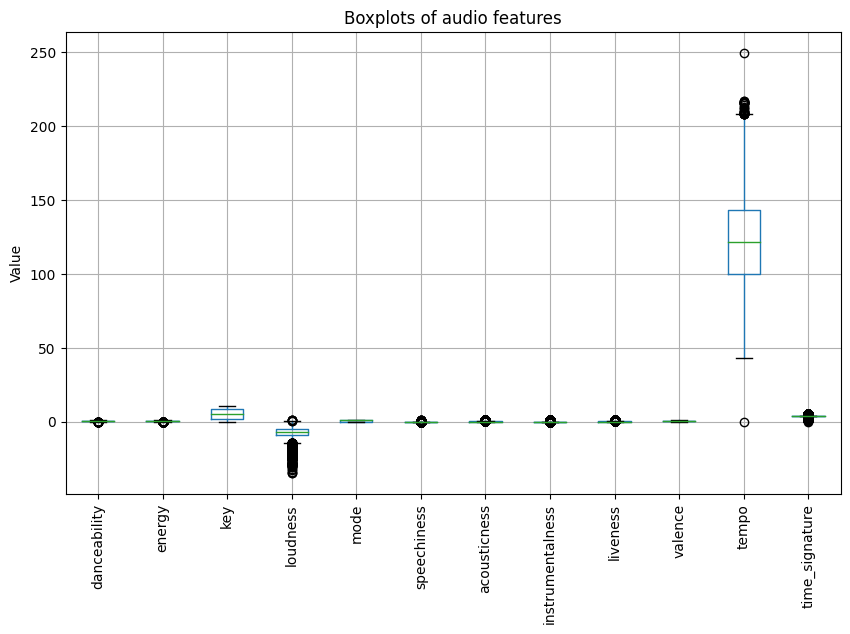

In [5]:
# Extract the feature columns from the dataframe
feature_cols = list(df.columns[1:])

# Plot boxplots of all features
fig, ax = plt.subplots(figsize=(10, 6))
df[feature_cols].boxplot(ax=ax)
ax.set_title('Boxplots of audio features')
ax.set_ylabel('Value')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


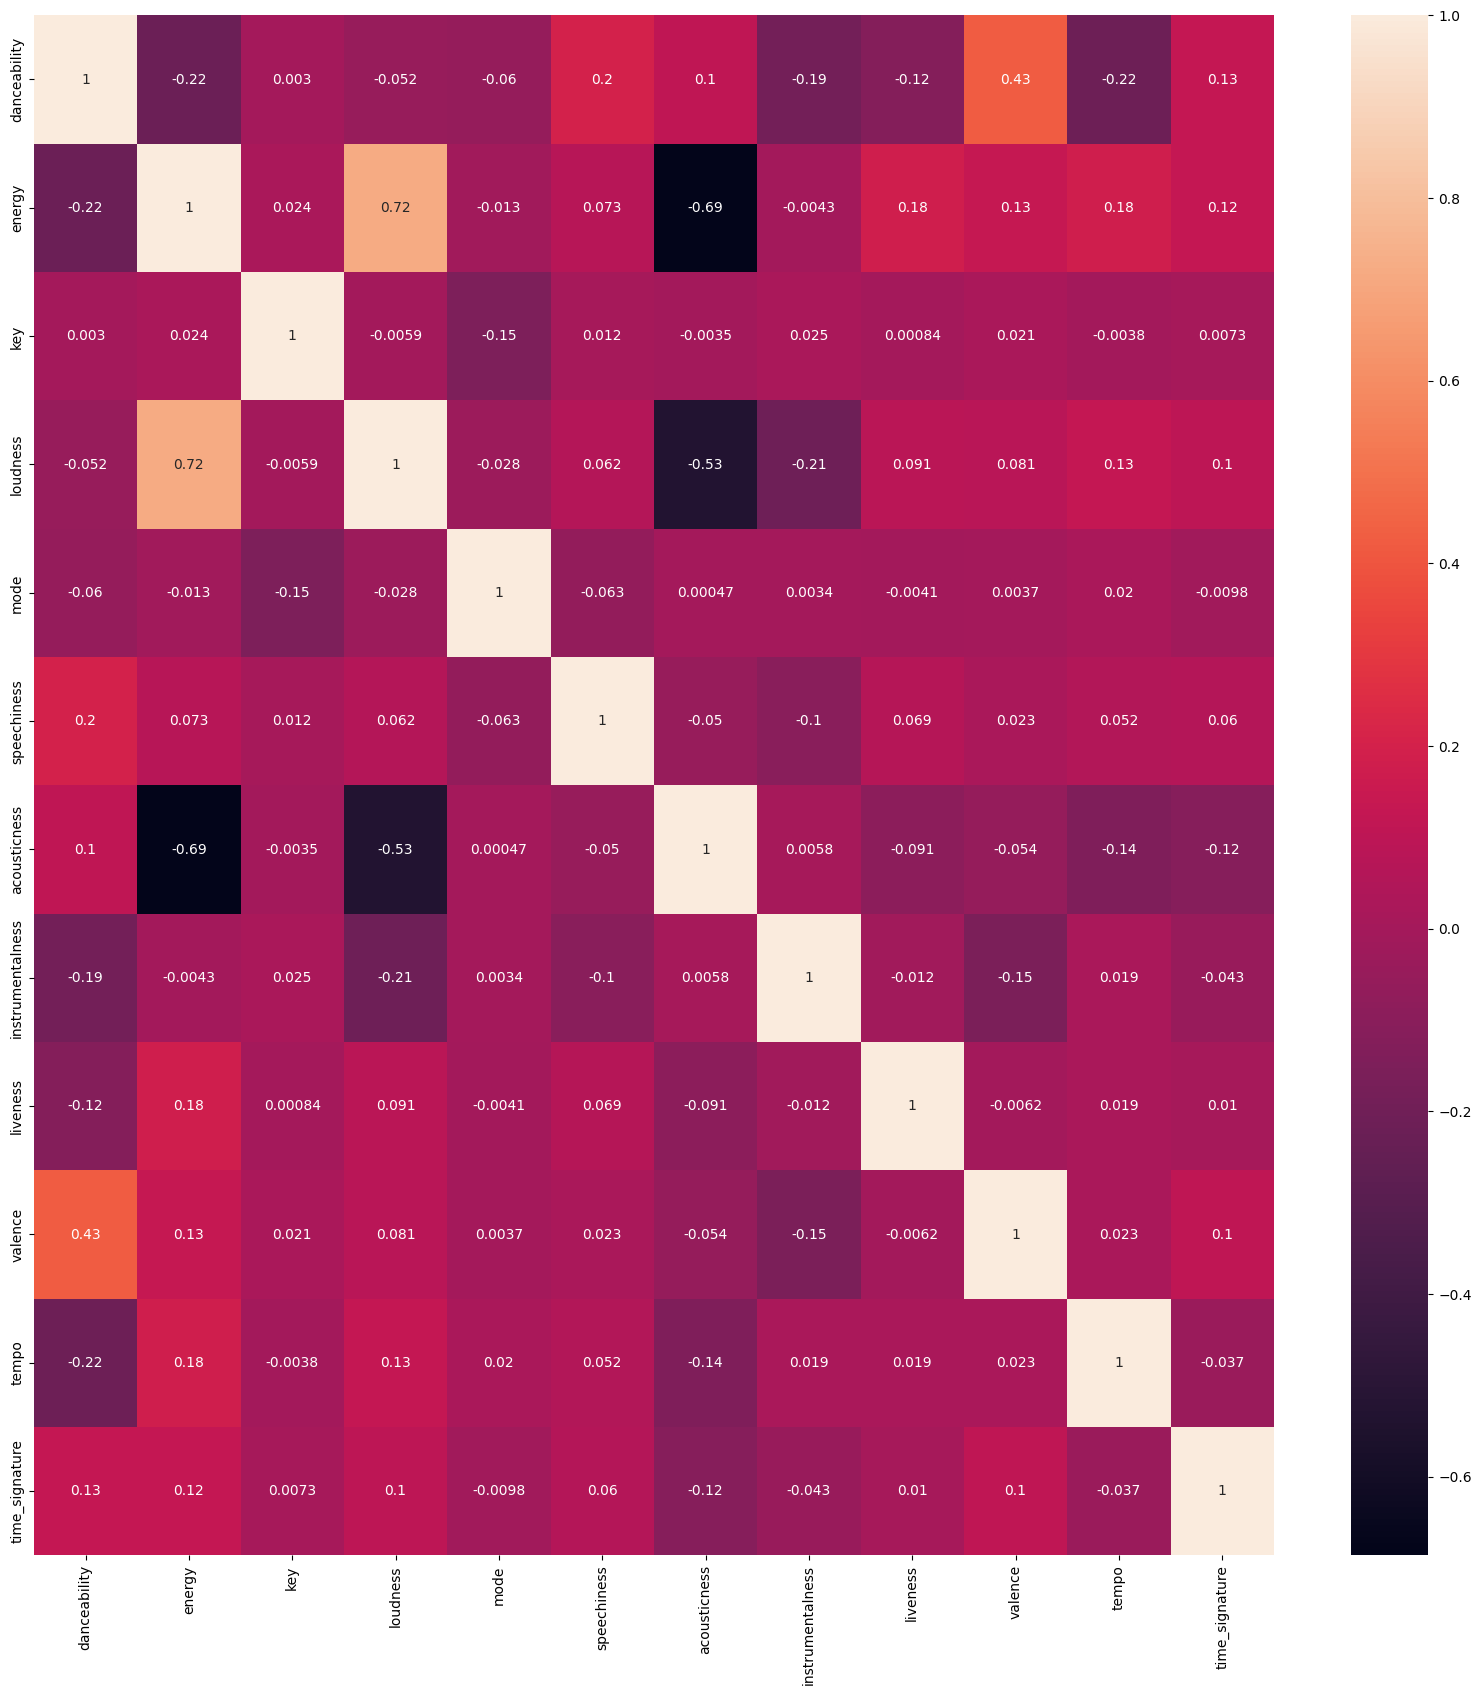

In [6]:
plt.figure(figsize = (20,20))
corr = df.iloc[: , 1:].corr()
dataplot = sns.heatmap(corr, annot=True)
plt.show()

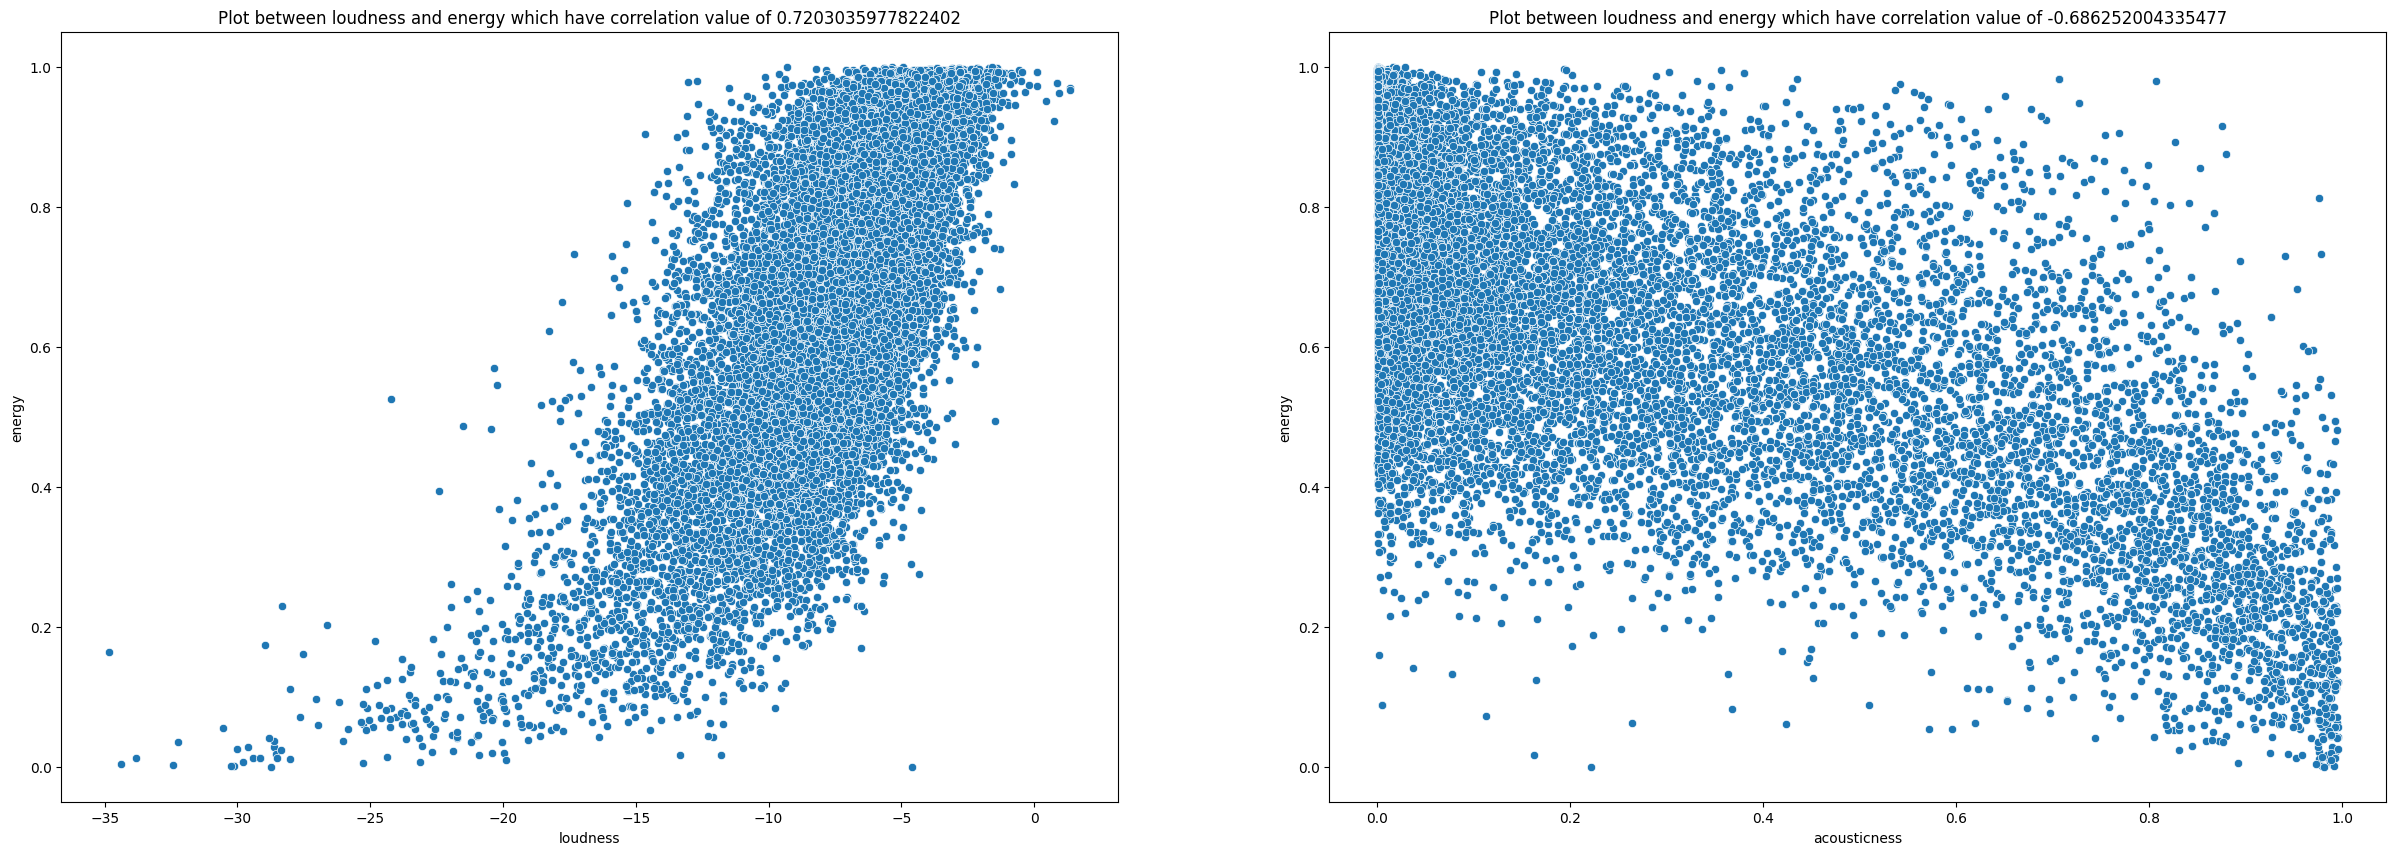

In [7]:
plt.figure(figsize = (30,10))

#plot between parameters with max correlation rating
plt.subplot(121)
sns.scatterplot(x = df['loudness'],y= df['energy'])
plt.title(f"Plot between loudness and energy which have correlation value of {corr['loudness']['energy']}")

#plot between parameters with min correlation rating
plt.subplot(122)
sns.scatterplot(x = df['acousticness'],y= df['energy'])
plt.title(f"Plot between loudness and energy which have correlation value of {corr['acousticness']['energy']}")

plt.show()

In [8]:
scaler = StandardScaler()
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

In [9]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2.675200e+04,2.675200e+04,2.675200e+04,2.675200e+04,2.675200e+04,26752.000000,2.675200e+04,26752.000000,2.675200e+04,2.675200e+04,2.675200e+04,2.675200e+04
mean,-4.462140e-16,-8.010604e-16,1.992027e-17,6.799452e-17,1.088975e-16,0.000000,1.274897e-17,0.000000,-1.243025e-16,1.827353e-16,1.997339e-16,1.014606e-16
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019,1.000019e+00,1.000019,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-3.309825e+00,-3.316549e+00,-1.485873e+00,-8.330535e+00,-1.285862e+00,-0.970447,-7.043007e-01,-0.449432,-1.193169e+00,-2.114783e+00,-4.215681e+00,-1.176318e+01
25%,-6.732107e-01,-6.688271e-01,-9.251246e-01,-4.741178e-01,-1.285862e+00,-0.562725,-6.953710e-01,-0.449432,-6.465358e-01,-7.741986e-01,-8.096306e-01,1.901214e-01
50%,-6.549817e-03,1.473462e-01,-8.400124e-02,1.909741e-01,7.776883e-01,-0.394170,-5.368222e-01,-0.448368,-4.116243e-01,-1.610420e-02,-6.083542e-02,1.901214e-01
75%,6.961468e-01,8.448897e-01,1.037497e+00,6.873024e-01,7.776883e-01,0.069357,3.695207e-01,-0.313746,4.396896e-01,7.676883e-01,6.668458e-01,1.901214e-01
max,2.630064e+00,1.428549e+00,1.598245e+00,2.592309e+00,7.776883e-01,9.962872,3.048422e+00,3.596778,5.080311e+00,2.108273e+00,4.278859e+00,3.178446e+00


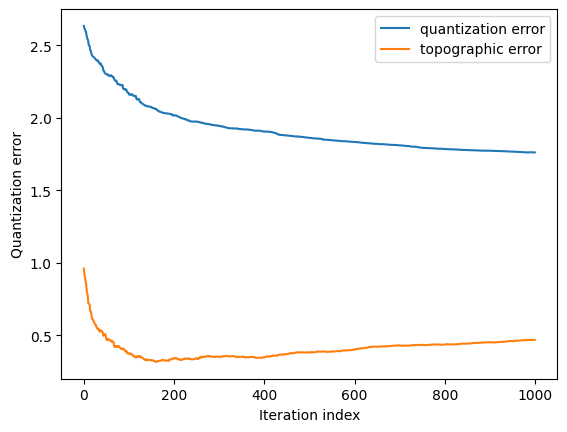

In [19]:
data = df.iloc[:,1:].values
# Initialize the SOM
som_shape = (20, 20)
input_dim = data.shape[1] # the number of features in your dataset
som = MiniSom(som_shape[0], som_shape[1], input_dim, sigma=1.0, learning_rate=0.5)

q_error = []
t_error = []

# Train the SOM
num_iterations = 1000
for i in range(num_iterations):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, num_iterations)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

# Visualize the results

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

In [20]:
# for each item in your dataset, find the best matching unit (BMU) in the SOM and use its coordinates as the encoded representation
encoded_data = np.array([som.winner(x) for x in data])


In [21]:
from sklearn.neighbors import NearestNeighbors
# define the number of neighbors to return
n_neighbors = 5
# define the distance metric to use
distance_metric = 'euclidean' # or 'cosine', or other distance metrics supported by scikit-learn
# initialize the nearest neighbors model with the encoded data
model = NearestNeighbors(n_neighbors=n_neighbors, metric=distance_metric)
model.fit(encoded_data)
# find the k nearest neighbors for a given item
query_item_index = 0 # replace with the index of the item you want to find similar items for
distances, indices = model.kneighbors(encoded_data[query_item_index].reshape(1, -1))
# indices[0] contains the indices of the k nearest neighbors of the query item in the encoded data
# distances[0] contains the distances between the query item and its k nearest neighbors in the encoded data
# here we print the indices of the k nearest neighbors
print(indices[0])
# here we print the items corresponding to the indices of the k nearest neighbors
print(data[indices[0]])
# here we print the items corresponding to the indices of the k nearest neighbors from the original dataset df with their id
print(df.iloc[indices[0], :]['id'])


[ 70 387 362   0 252]
[[-0.53507379  0.66931753 -0.92512458  0.17044471  0.77768827 -0.57639209
  -0.70411038 -0.4491691  -0.69774263  1.33304678 -1.64311977  0.19012143]
 [ 0.28173599  0.2422501  -1.48587347  0.14236775  0.77768827 -0.47730889
  -0.68173156 -0.44622666 -0.5204389   1.45297131  0.29377636  0.19012143]
 [ 0.84028973  0.78320218 -1.48587347  0.00771908  0.77768827 -0.49553109
  -0.41568761 -0.44943194 -0.72334606  1.12317885 -0.49687202  0.19012143]
 [-0.56510356  0.99673589 -1.48587347 -0.67005279  0.77768827 -0.60941983
  -0.69827218 -0.4483107  -0.40522348  1.11889583 -0.26540211  0.19012143]
 [-0.64918692  0.18056258 -1.48587347  0.82195104  0.77768827 -0.63675313
  -0.69868664 -0.43643207 -0.49483547  1.08034866 -0.28995556  0.19012143]]
70     5E5HYgxGMp3BPakHGfKfIB
387    4OvQsAObGMF3dpkCV6DZzb
362    32srSGuuy12hEhrD2iCIIK
0      2CdS3DRqWR5LAhy4hM5X9W
252    6b6XeGBvvFEde9uSUTzDpo
Name: id, dtype: object


In [29]:
# generate a random item from the the orginal dataset df
random_item = df.sample(1)
# encode the random item
encoded_random_item = som.winner(random_item.iloc[:,1:].values)
# find the k nearest neighbors for the encoded random item
encoded_random_item = np.array(encoded_random_item)
distances, indices = model.kneighbors(encoded_random_item.reshape(1, -1))
# here we print the indices of the k nearest neighbors
print(indices[0])
# here we print the items corresponding to the indices of the k nearest neighbors
print(data[indices[0]])
# here we print the items corresponding to the indices of the k nearest neighbors from the original dataset df with their id
print(df.iloc[indices[0], :]['id'])


[ 341 2096 7442 1582 9911]
[[-0.47501425  0.17107219 -0.36437569 -0.78205874 -1.28586227 -0.62308648
  -0.6818446  -0.44439449 -0.20679692  0.63919771 -0.44211204  0.19012143]
 [ 0.02948591 -0.07567788 -1.20549902 -0.57887813 -1.28586227 -0.54450325
  -0.32375343 -0.21502804  0.19645706  0.85763167 -0.77595044  0.19012143]
 [-0.47501425  0.17107219 -0.36437569 -0.78205874 -1.28586227 -0.62308648
  -0.6818446  -0.44439449 -0.20679692  0.63919771 -0.44211204  0.19012143]
 [-0.4810202  -0.31768275 -0.92512458 -1.39250629 -1.28586227 -0.32355909
  -0.36670628 -0.44943194  0.40128448  0.37793355 -0.90423456  0.19012143]
 [-0.4810202  -0.31768275 -0.92512458 -1.39250629 -1.28586227 -0.32355909
  -0.36670628 -0.44943194  0.40128448  0.37793355 -0.90423456  0.19012143]]
341     4tBl1xhBg5PETpBvFnQmGl
2096    6LeELseYz1Q0T93DXCnP2d
7442    4tBl1xhBg5PETpBvFnQmGl
1582    0ccjxgOzjXeXu5zjqqaRiB
9911    0ccjxgOzjXeXu5zjqqaRiB
Name: id, dtype: object
